In [11]:
%matplotlib ipympl
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# JSON files -> lists of dictionaries
with open('./ui_all_q_p.json') as json_file:
    ui_all_q_p = json.load(json_file)
    
with open('./ui_all_q.json') as json_file:
    ui_all_q = json.load(json_file)

In [12]:
# [{}] -> [[]] 

ui_data = []

for d in ui_all_q_p:   
    for x,y in d.items() :
        name = x
        f1_mean = y['f1_mean']
        roc_mean = y['roc_mean']
        precision_mean = y['precision_mean']
        recall_mean = y['recall_mean']
        ui_data.append(['ui_all_q_p', name,f1_mean, roc_mean, precision_mean, recall_mean])

for d in ui_all_q:   
    for x,y in d.items() :
        name = x
        f1_mean = y['f1_mean']
        roc_mean = y['roc_mean']
        precision_mean = y['precision_mean']
        recall_mean = y['recall_mean']
        ui_data.append(['ui_all_q', name,f1_mean, roc_mean, precision_mean, recall_mean])

In [13]:
# [[]] -> dataframe
df_ui_data = pd.DataFrame(ui_data, columns=['QuestionSet', 'Model', 'f1', 'roc_auc', 'precision', 'recall'])

In [4]:
df_ui_data['precision'].describe()

count    132.000000
mean       0.132222
std        0.094666
min        0.000000
25%        0.068873
50%        0.119796
75%        0.183333
max        0.411475
Name: precision, dtype: float64

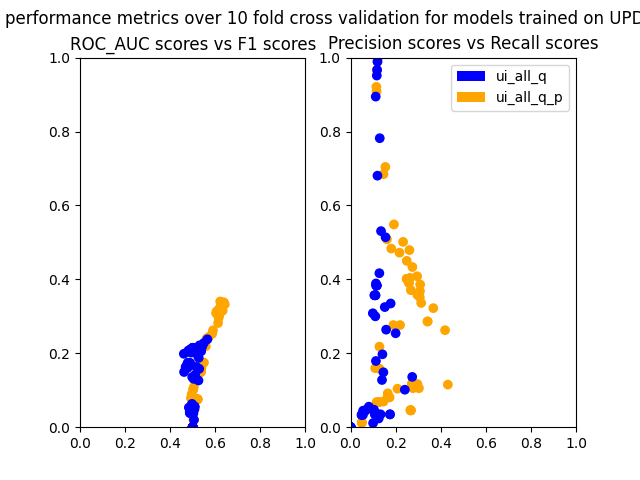

In [14]:
# UPDRS I plot

colors = {'ui_all_q':'blue', 'ui_all_q_p':'orange'}

fig = plt.figure()
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# plot 1
ax.set_title("ROC_AUC scores vs F1 scores")
ax.scatter(df_ui_data['roc_auc'], df_ui_data['f1'], c=df_ui_data['QuestionSet'].map(colors), label=['ui_all_q','ui_all_q_p'])
ax.set_xlim([0,1])
ax.set_ylim([0,1])


# plot 2
ax2.set_title("Precision scores vs Recall scores")
ax2.scatter(df_ui_data['precision'], df_ui_data['recall'], c=df_ui_data['QuestionSet'].map(colors))
ax2.set_xlim([0,1])
ax2.set_ylim([0,1])

classes = ['ui_all_q','ui_all_q_p']
class_colours = ['blue','orange']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
ax2.legend(recs,classes,loc=1)

plt.suptitle("Averaged performance metrics over 10 fold cross validation for models trained on UPDRS I data")
plt.show()

In [15]:
# df_ui_data.query("roc_auc > 0.6 and precision > 0.2")
x = df_ui_data.sort_values('precision', ascending=False)
x.head(n=20)
# General Observations for UPDRS I:
# Nothing worth getting excited about
# + PREV_SIGFALL out performs w/o


,QuestionSet,Model,f1,roc_auc,precision,recall
56,ui_all_q_p,XGB1,0.174865,0.549740,0.431667,0.115278
28,ui_all_q_p,SVM2,0.313559,0.606138,0.419167,0.262500
11,ui_all_q_p,LDA3,0.340150,0.621825,0.367143,0.322222
17,ui_all_q_p,LDA9,0.308630,0.604551,0.341667,0.286111
14,ui_all_q_p,LDA6,0.308630,0.604551,0.341667,0.286111
26,ui_all_q_p,QDA9,0.319178,0.616084,0.313322,0.336111
7,ui_all_q_p,GNB8,0.336667,0.634883,0.308723,0.386111
10,ui_all_q_p,LDA2,0.332456,0.627406,0.307828,0.368056
8,ui_all_q_p,GNB9,0.319938,0.623016,0.307217,0.351389
50,ui_all_q_p,ADA2,0.151039,0.535491,0.303333,0.105556
